# Application of Digital Signal Processing in Biomedical Signal Processing: ECG, EEG, EMG Analysis

In [4]:
# Required Libraries

#!pip install wfdb biosppy neurokit2

In [5]:
#!pip install --upgrade FuzzyTM neurokit2 wfdb biosppy

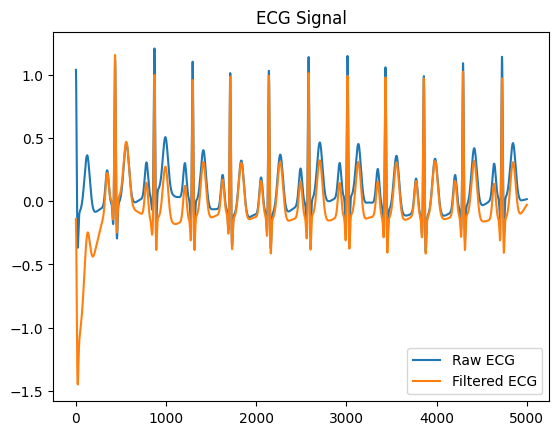

In [6]:
# Loading and Filtering ECG Signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

# Simulate ECG
ecg = nk.ecg_simulate(duration=10, sampling_rate=500)
fs = 500  # Sampling rate

# Bandpass filter design
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, 0.5, 40, fs)

# Plotting
plt.plot(ecg, label='Raw ECG')
plt.plot(filtered_ecg, label='Filtered ECG')
plt.title("ECG Signal")
plt.legend()
plt.show()

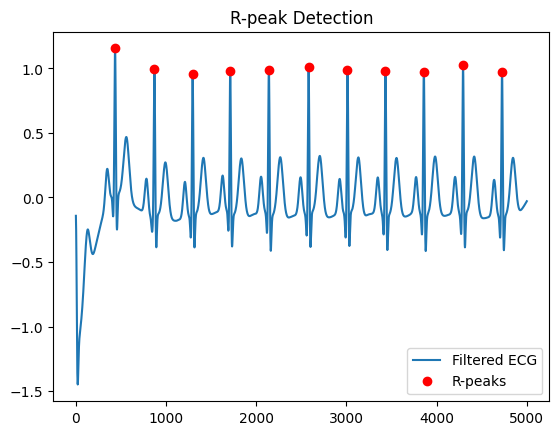

In [7]:
# R-peak Detection

signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.legend()
plt.show()

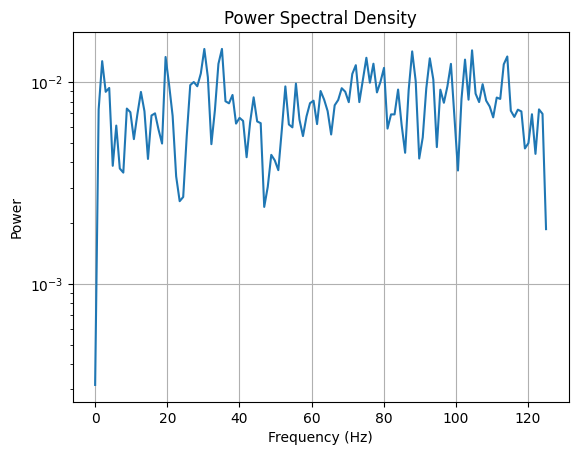

In [8]:
# Spectral Analysis of EEG or EMG (Optional)

from scipy.signal import welch

# Simulate random EEG
np.random.seed(0)
eeg = np.random.randn(1024)
f, Pxx = welch(eeg, fs=250)

plt.semilogy(f, Pxx)
plt.title("Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid(True)
plt.show()

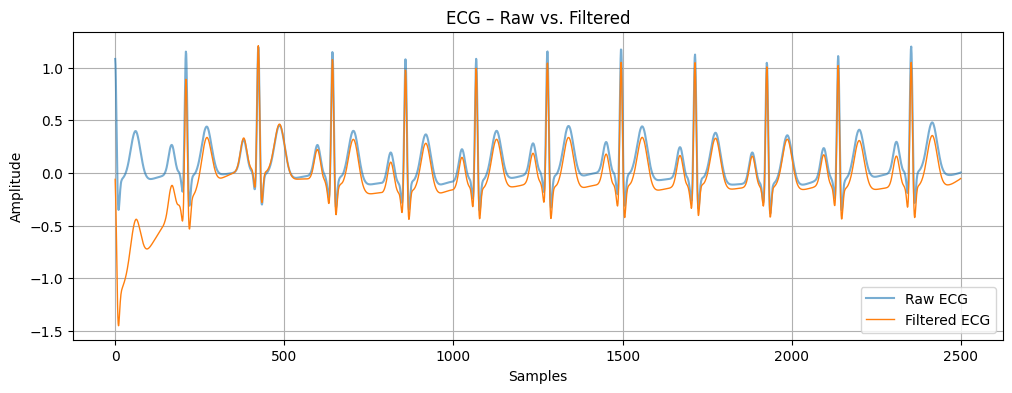

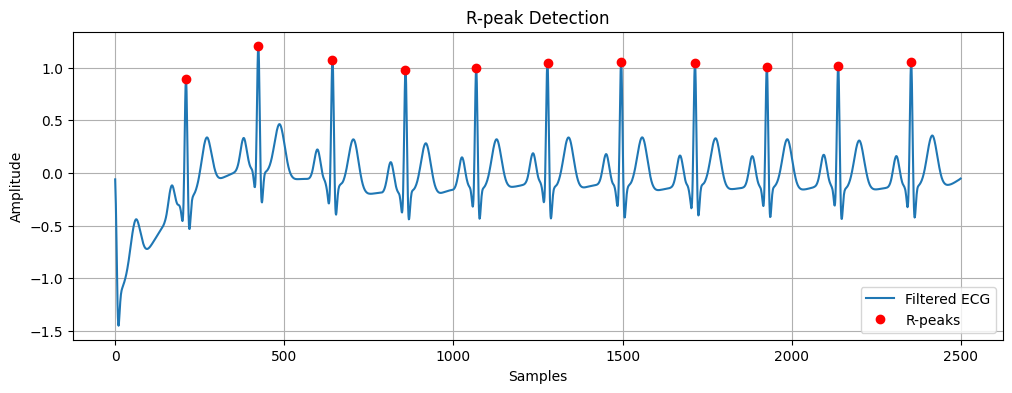

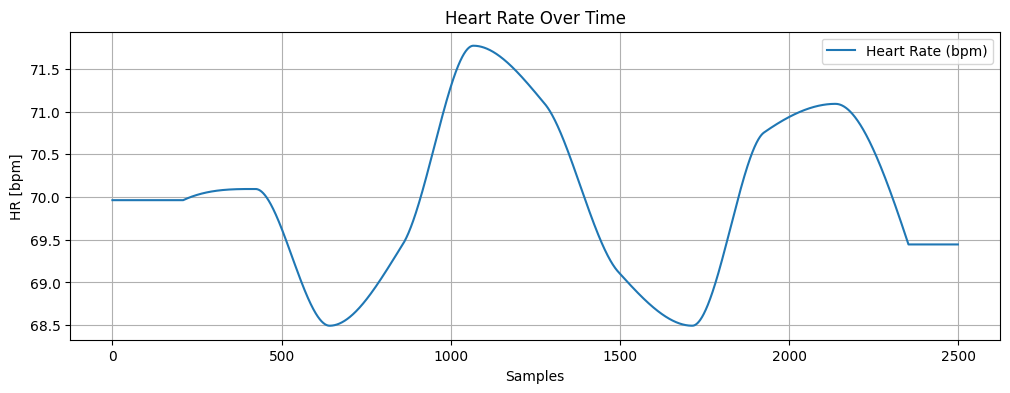

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

# 1. Simulate ECG signal
duration = 10  # duration in seconds
fs = 250       # sampling frequency in Hz
ecg = nk.ecg_simulate(duration=duration, sampling_rate=fs)

# 2. Bandpass filter: 0.3–30 Hz
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, 0.3, 30, fs)

# 3. R-peak detection
signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

# 4. Compute heart rate from R-peaks
heart_rate = nk.ecg_rate(r_peaks, sampling_rate=fs, desired_length=len(ecg))

# 5. Visualize results

# a) Raw and filtered ECG signal
plt.figure(figsize=(12, 4))
plt.plot(ecg, label="Raw ECG", alpha=0.6)
plt.plot(filtered_ecg, label="Filtered ECG", linewidth=1)
plt.legend()
plt.title("ECG – Raw vs. Filtered")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# b) Filtered signal with R-peaks
plt.figure(figsize=(12, 4))
plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

# c) Heart Rate plot
plt.figure(figsize=(12, 4))
plt.plot(heart_rate, label="Heart Rate (bpm)")
plt.title("Heart Rate Over Time")
plt.xlabel("Samples")
plt.ylabel("HR [bpm]")
plt.legend()
plt.grid()
plt.show()
